In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta
# Load dataset
df = pd.read_csv("test(in).csv")
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [26]:
#task 1
!pip install textblob
from textblob import TextBlob
# # Function to classify sentiment based on polarity score
def sentiment_analyzer(text):
    sentiment = TextBlob(text)
    score = sentiment.sentiment.polarity
    #classification of score
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Analyze sentiment for each message
sentiment_labels = []
for text in df['body']:
    label = sentiment_analyzer(text)
    sentiment_labels.append(label)
df['Sentiment'] = sentiment_labels
#df['Sentiment'] = df['body'].apply(sentiment)
df.head()

,Subject,body,date,from,Sentiment,Month,Score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,2010-05,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Negative,2010-07,0
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,2011-07,0
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Negative,2010-03,-1
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Negative,2011-05,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Subject    2191 non-null   object        
 1   body       2191 non-null   object        
 2   date       2191 non-null   datetime64[ns]
 3   from       2191 non-null   object        
 4   Sentiment  2191 non-null   object        
 5   Month      2191 non-null   period[M]     
 6   Score      2191 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4), period[M](1)
memory usage: 119.9+ KB

Missing Values:
 Subject      0
body         0
date         0
from         0
Sentiment    0
Month        0
Score        0
dtype: int64

Sentiment Label Distribution:
 Sentiment
Positive    1218
Neutral      703
Negative     270
Name: count, dtype: int64


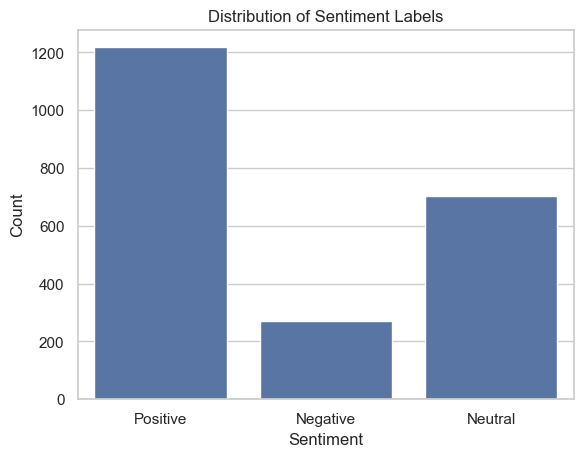

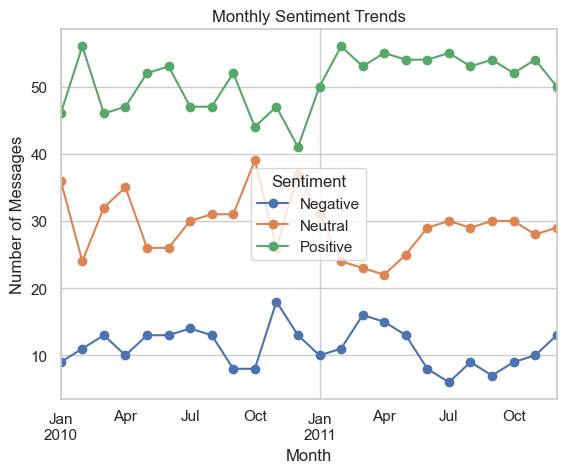

C:\Users\mahit\AppData\Local\Temp\ipykernel_35684\4158264525.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_employees.index, x=top_employees.values, palette="coolwarm")


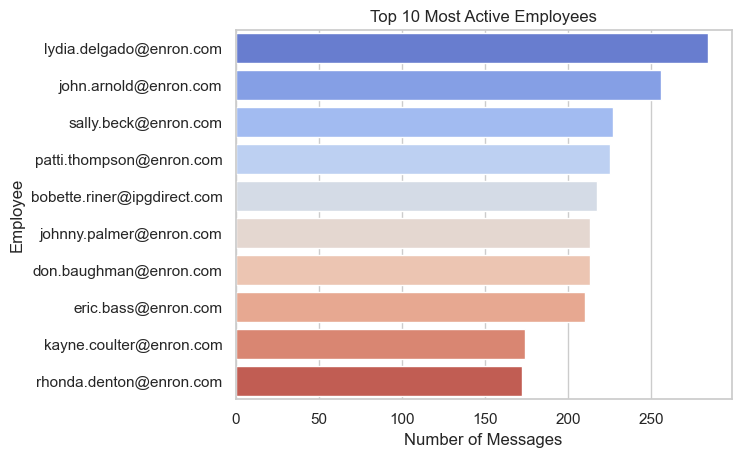

In [27]:
#task 2
# check data structure and input types
df.info()
# checks for missing values
print("\nMissing Values:\n", df.isnull().sum())

df.head()
# Count how many messages fall into each sentiment category
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Label Distribution:\n", sentiment_counts)

sns.countplot(data=df, x='Sentiment')
plt.title("Distribution of Sentiment Labels")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()


#Convert 'date' to datetime and extract month
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.to_period('M')
# Group by month and sentiment, count messages
monthly_trends = df.groupby(['Month', 'Sentiment']).size().unstack().fillna(0)
#plots
monthly_trends.plot(kind='line',marker='o')
plt.title("Monthly Sentiment Trends")
plt.ylabel("Number of Messages")
plt.xlabel("Month")
plt.grid(True)
plt.show()

top_employees = df['from'].value_counts().head(10)
sns.barplot(y=top_employees.index, x=top_employees.values, palette="coolwarm")
plt.title("Top 10 Most Active Employees")
plt.xlabel("Number of Messages")
plt.ylabel("Employee")
plt.show()



In [30]:
#task 3
# Define numerical scores for each sentiment label
score_map = {'Positive': 1,'Neutral': 0,'Negative': -1}
# Map sentiment labels to scores and store in a new column
df['Score'] = df['Sentiment'].map(score_map)
# Group by employee and month, then sum sentiment scores for each group
monthly_scores = df.groupby(['from', 'Month']).agg(MonthlyScore=('Score', 'sum'))

monthly_scores




MonthlyScore
from                        Month                
bobette.riner@ipgdirect.com 2010-01             2
                            2010-02             8
                            2010-03             4
                            2010-04             4
                            2010-05             2
                            2010-06             0
                            2010-07             8
                            2010-08             1
                            2010-09             7
                            2010-10             3
                            2010-11             3
                            2010-12             2
                            2011-01             9
                            2011-02             1
                            2011-03             7
                            2011-04             8
                            2011-05             1
                            2011-06             5
                            2011-07             3
                            2011-08             1
                            2011-09             4
                            2011-10             0
                            2011-11             8
                            2011-12             0
don.baughman@enron.com      2010-01             5
                            2010-02             5
                            2010-03             1
                            2010-04             8
                            2010-05             7
                            2010-06            11
                            2010-07             3
                            2010-08             2
                            2010-09             2
                            2010-10             1
                            2010-11             3
                            2010-12             6
                            2011-01             4
                            2011-02             2
                            2011-03             1
                            2011-04             2
                            2011-05             6
                            2011-06             0
                            2011-07             2
                            2011-08             7
                            2011-09             5
                            2011-10             6
                            2011-11             2
                            2011-12             4
eric.bass@enron.com         2010-01             5
                            2010-02             4
                            2010-03             0
                            2010-04             0
                            2010-05             5
                            2010-06             0
                            2010-07             6
                            2010-08             0
                            2010-09             3
                            2010-10             6
                            2010-11             4
                            2010-12             2
                            2011-01             6
                            2011-02             1
                            2011-03             4
                            2011-04             6
                            2011-05             6
                            2011-06            10
                            2011-07             3
                            2011-08             4
                            2011-09             8
                            2011-10             3
                            2011-11             1
                            2011-12             4
john.arnold@enron.com       2010-01             3
                            2010-02            10
                            2010-03             5
                            2010-04             5
                            2010-05             1
                            2010-06             3
                            2010-07  

                            from    Month  MonthlyScore
120      kayne.coulter@enron.com  2010-01             9
24        don.baughman@enron.com  2010-01             5
48           eric.bass@enron.com  2010-01             5
73         john.arnold@enron.com  2010-02            10
1    bobette.riner@ipgdirect.com  2010-02             8
97       johnny.palmer@enron.com  2010-02             7
218         sally.beck@enron.com  2010-03             8
146      lydia.delgado@enron.com  2010-03             6
74         john.arnold@enron.com  2010-03             5
27        don.baughman@enron.com  2010-04             8
123      kayne.coulter@enron.com  2010-04             6
75         john.arnold@enron.com  2010-04             5
28        don.baughman@enron.com  2010-05             7
172     patti.thompson@enron.com  2010-05             6
220         sally.beck@enron.com  2010-05             6
29        don.baughman@enron.com  2010-06            11
101      johnny.palmer@enron.com  2010-06       

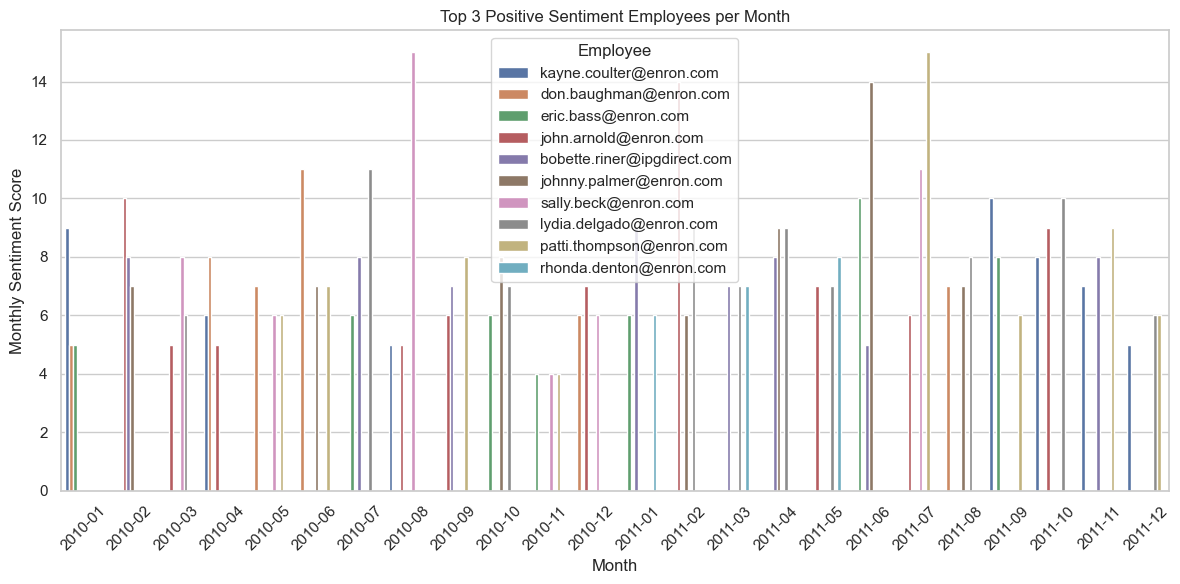

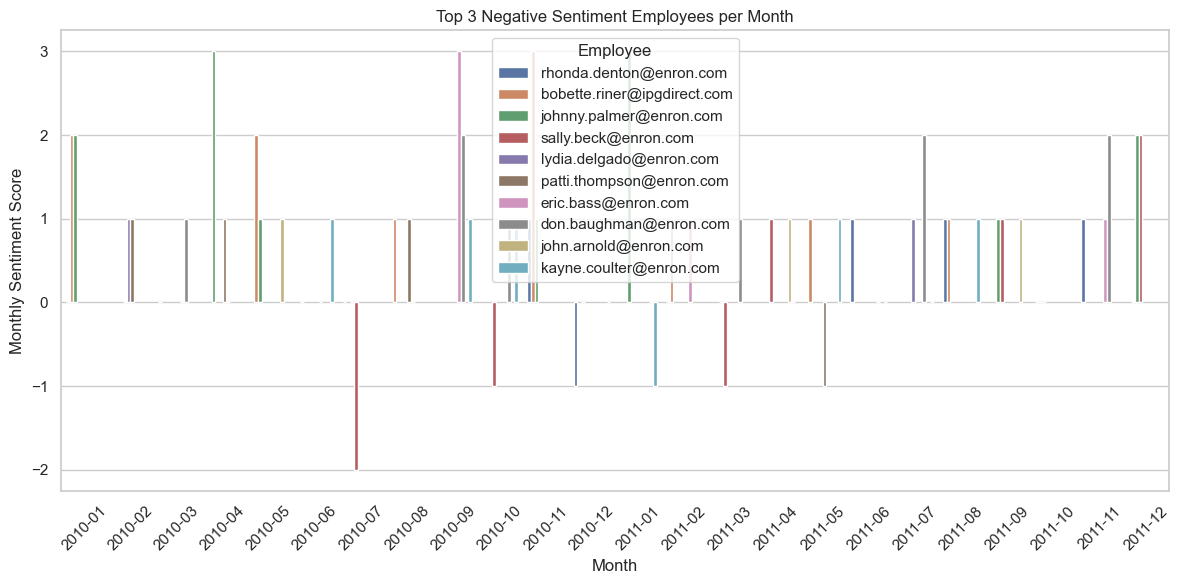

In [32]:
#task 4
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Reset the index so 'from' and 'Month' become regular columns 
monthly_scores = monthly_scores.reset_index()
# Get the top 3 employees with the highest sentiment scores for each month
top_positive = (monthly_scores.sort_values(by=['Month', 'MonthlyScore', 'from'], ascending=[True, False, True]).groupby('Month').head(3))
# Get the bottom 3 employees with the lowest (most negative) sentiment scores for each month
top_negative = (monthly_scores.sort_values(by=['Month', 'MonthlyScore', 'from'], ascending=[True, True, True]).groupby('Month').head(3))

print(top_positive)
print("break")
print(top_negative)
sns.set(style="whitegrid")

# Plots
plt.figure(figsize=(12, 6))
sns.barplot(data=top_positive, x='Month', y='MonthlyScore', hue='from')
plt.title('Top 3 Positive Sentiment Employees per Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Month')
plt.legend(title='Employee')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_negative, x='Month', y='MonthlyScore', hue='from')
plt.title('Top 3 Negative Sentiment Employees per Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Month')
plt.legend(title='Employee')
plt.tight_layout()
plt.show()


In [60]:
#task 5
# Filter the dataframe to only include rows where the 'Sentiment' column is 'Negative'
neg = df[df['Sentiment'] == 'Negative'].copy()
neg.sort_values(by=['from', 'date'], inplace=True)
flight_risk_employees = []
# Group the negative sentiment data by employee ('from' column)
for emp, group in neg.groupby('from'):
    print(emp)
    dates_per_person = list(group['date'])
    for x in range(len(dates_per_person)):
        start = dates_per_person[x]
        print(start)
        count = 1
        # Count how many negative dates fall within 30 days of start
        for y in range(x + 1, len(dates_per_person)):
            if dates_per_person[y] - start <= timedelta(days=30):
                print(dates_per_person[y],start)
                count += 1
                #print(emp)
            else:
                break
        if count >= 4:
            flight_risk_employees.append(emp)
            break 
flight_risk_employees



bobette.riner@ipgdirect.com
2010-02-21 00:00:00
2010-06-15 00:00:00
2010-07-24 00:00:00
2010-08-09 00:00:00 2010-07-24 00:00:00
2010-08-16 00:00:00 2010-07-24 00:00:00
2010-08-09 00:00:00
2010-08-16 00:00:00 2010-08-09 00:00:00
2010-08-26 00:00:00 2010-08-09 00:00:00
2010-08-16 00:00:00
2010-08-26 00:00:00 2010-08-16 00:00:00
2010-08-26 00:00:00
2010-09-16 00:00:00 2010-08-26 00:00:00
2010-09-16 00:00:00
2010-11-02 00:00:00
2010-11-08 00:00:00 2010-11-02 00:00:00
2010-11-10 00:00:00 2010-11-02 00:00:00
2010-11-17 00:00:00 2010-11-02 00:00:00
2010-11-19 00:00:00 2010-11-02 00:00:00
don.baughman@enron.com
2010-02-13 00:00:00
2010-02-20 00:00:00 2010-02-13 00:00:00
2010-02-25 00:00:00 2010-02-13 00:00:00
2010-03-07 00:00:00 2010-02-13 00:00:00
eric.bass@enron.com
2010-01-10 00:00:00
2010-03-19 00:00:00
2010-03-21 00:00:00 2010-03-19 00:00:00
2010-03-23 00:00:00 2010-03-19 00:00:00
2010-04-15 00:00:00 2010-03-19 00:00:00
john.arnold@enron.com
2010-01-10 00:00:00
2010-03-06 00:00:00
2010-03

['bobette.riner@ipgdirect.com',
 'don.baughman@enron.com',
 'eric.bass@enron.com',
 'john.arnold@enron.com',
 'johnny.palmer@enron.com',
 'kayne.coulter@enron.com',
 'lydia.delgado@enron.com',
 'patti.thompson@enron.com',
 'rhonda.denton@enron.com',
 'sally.beck@enron.com']

In [62]:
#task 6
# Count messages per sender and month
messages = df.groupby(['from', 'Month']).agg(Count=('body', 'count')).reset_index()
# Merge counts with monthly scores
features_df = pd.merge(monthly_scores, messages, on=['from', 'Month'])
# Create numeric month feature for modeling
features_df['Year'] = features_df['Month'].dt.year
features_df['MonthOnly'] = features_df['Month'].dt.month
features_df['Month'] = features_df['Year'] * 12 + features_df['MonthOnly']
print(features_df)
X = features_df[['Month', 'Count']]
y = features_df['MonthlyScore']
# Split data and train linear regression model
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred))

#this model shows that frequency of messages per month and the specific month which
#are the 2 main features used in the model have a significant enough imapct on the employee 
#sentiment because of the mse score of 4.12 but since there is a pretty large variance of 54% 
#there are potentially other features that can be added to increase precision. 

                            from  Month  MonthlyScore  Count  Year  MonthOnly
0    bobette.riner@ipgdirect.com  24121             2      2  2010          1
1    bobette.riner@ipgdirect.com  24122             8     14  2010          2
2    bobette.riner@ipgdirect.com  24123             4     11  2010          3
3    bobette.riner@ipgdirect.com  24124             4      6  2010          4
4    bobette.riner@ipgdirect.com  24125             2      4  2010          5
5    bobette.riner@ipgdirect.com  24126             0      5  2010          6
6    bobette.riner@ipgdirect.com  24127             8     12  2010          7
7    bobette.riner@ipgdirect.com  24128             1      9  2010          8
8    bobette.riner@ipgdirect.com  24129             7     15  2010          9
9    bobette.riner@ipgdirect.com  24130             3      6  2010         10
10   bobette.riner@ipgdirect.com  24131             3     16  2010         11
11   bobette.riner@ipgdirect.com  24132             2      8  20